In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA, LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
import sklearn
from sklearn import tree
from sklearn.preprocessing import MultiLabelBinarizer
import ast
from collections import Counter

C:\Users\artem\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\artem\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('titles.csv')

In [3]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [5]:
df = df.drop(['id','imdb_id'], axis=1) #Drop ids
df.isna().sum() #Check dataset values for missing values

title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

We can see that there is a problem with movies, as they have no seasons.\
Apart from that age restriction is 0 where it is NaN.\
If the data will not be enough we can also leave imdb scores and votes (putting mean number for missing) in order to enrich data

In [6]:
df[df['age_certification'].isna()]

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0,20.398,7.6
10,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,7.5,50748.0,13.844,7.3
13,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy']",['US'],NaN,7.5,42488.0,8.915,7.2
14,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],NaN,7.5,4471.0,5.546,7.3
17,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,['drama'],['EG'],NaN,7.2,1727.0,1.370,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN
5845,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.8,45.0,1.466,NaN
5846,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,7.7,348.0,NaN,NaN
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,3.8,68.0,26.005,6.3


In [7]:
df[df['seasons'].isna()]

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0,20.398,7.600
6,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,8.0,395024.0,17.770,7.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN
5845,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.8,45.0,1.466,NaN
5846,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,7.7,348.0,NaN,NaN
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,3.8,68.0,26.005,6.300


In [8]:
df['age_certification'] = df['age_certification'].where(df['age_certification'].notna(), 'None') #changing to None
df['seasons'] = df['seasons'].fillna(0) #changing to 0

In [9]:
df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,None,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,None,100,"['romance', 'drama']",['NG'],0.0,6.8,45.0,1.466,NaN
5846,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,None,134,['drama'],[],0.0,7.7,348.0,NaN,NaN
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,None,90,['comedy'],['CO'],0.0,3.8,68.0,26.005,6.300
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],0.0,NaN,NaN,1.296,10.000


In [10]:
df.isna().sum() #Check dataset values for missing values

title                     1
type                      0
description              18
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              482
imdb_votes              498
tmdb_popularity          91
tmdb_score              311
dtype: int64

In [11]:
df = df.dropna() #droping rows with mnissing data

In [12]:
df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,None,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600
5,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Happiness Ever After,MOVIE,Five years later from where we left our charac...,2021,None,99,"['drama', 'romance']",['ZA'],0.0,4.2,163.0,11.536,7.300
5842,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,None,25,"['animation', 'family']",[],0.0,5.6,38.0,53.762,6.300
5843,My Bride,MOVIE,The story follows a young man and woman who go...,2021,None,93,"['romance', 'comedy', 'drama']",['EG'],0.0,5.0,327.0,2.545,5.300
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,None,90,['comedy'],['CO'],0.0,3.8,68.0,26.005,6.300


We are still left with 5129 rows, which should be enough to create robust analysis\
We also have to deal with data in lists

In [18]:
df1 = df.copy(deep = False)

In [19]:
#dealing with data in lists
data_in_lists = ['genres', 'production_countries']
mlb = MultiLabelBinarizer()
for col in data_in_lists:
    df1[col] = df1[col].apply(ast.literal_eval)
    positions_encoded = pd.DataFrame(mlb.fit_transform(df1[col]), columns=mlb.classes_)
    df1 = df1.drop(col, axis=1).join(positions_encoded)
df1

,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,0.0,8.2,808582.0,40.965,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,0.0,7.7,107673.0,10.010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,0.0,8.2,534486.0,15.461,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,None,150,0.0,7.7,72662.0,20.398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,4.0,8.8,73424.0,17.617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Happiness Ever After,MOVIE,Five years later from where we left our charac...,2021,None,99,0.0,4.2,163.0,11.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5842,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,None,25,0.0,5.6,38.0,53.762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5843,My Bride,MOVIE,The story follows a young man and woman who go...,2021,None,93,0.0,5.0,327.0,2.545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,None,90,0.0,3.8,68.0,26.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df1.isna().sum() #Check dataset values for missing values

title                  0
type                   0
description            0
release_year           0
age_certification      0
                    ... 
VE                   591
VN                   591
XX                   591
ZA                   591
ZW                   591
Length: 135, dtype: int64

In [22]:
df1 = df1.fillna(0) #changing to 0

In [23]:
df1.isna().sum()

title                0
type                 0
description          0
release_year         0
age_certification    0
                    ..
VE                   0
VN                   0
XX                   0
ZA                   0
ZW                   0
Length: 135, dtype: int64

# EDA

In [24]:
df1.columns.tolist()

['title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'seasons',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'action',
 'animation',
 'comedy',
 'crime',
 'documentation',
 'drama',
 'european',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'reality',
 'romance',
 'scifi',
 'sport',
 'thriller',
 'war',
 'western',
 'AE',
 'AL',
 'AO',
 'AR',
 'AT',
 'AU',
 'BD',
 'BE',
 'BF',
 'BG',
 'BR',
 'BS',
 'BT',
 'CA',
 'CD',
 'CH',
 'CL',
 'CM',
 'CN',
 'CO',
 'CU',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EG',
 'ES',
 'FI',
 'FO',
 'FR',
 'GB',
 'GE',
 'GH',
 'GL',
 'GR',
 'GT',
 'HK',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IO',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JO',
 'JP',
 'KE',
 'KH',
 'KN',
 'KR',
 'KW',
 'LB',
 'LK',
 'LT',
 'LU',
 'Lebanon',
 'MA',
 'MC',
 'MT',
 'MU',
 'MW',
 'MX',
 'MY',
 'NG',
 'NL',
 'NO',
 'NP',
 'NZ',
 'PE',
 'PH',
 'PK',
 'PL',
 'PR',
 'PS',
 'PT',
 'PY',
 'QA',
 'RO',
 'RS',
 'RU',
 'SA',
 'SE',
 'S

In [25]:
categorical_features = ['type','age_certification', 'release_year']  #divide into features into categorical and numerical
numerical_features = ['release_year','runtime','seasons','imdb_score', 'imdb_votes','tmdb_popularity','tmdb_score']

print("Categorical fields are: ", categorical_features)
print("Numerical fields are: ", numerical_features)

Categorical fields are:  ['type', 'age_certification', 'release_year']
Numerical fields are:  ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']


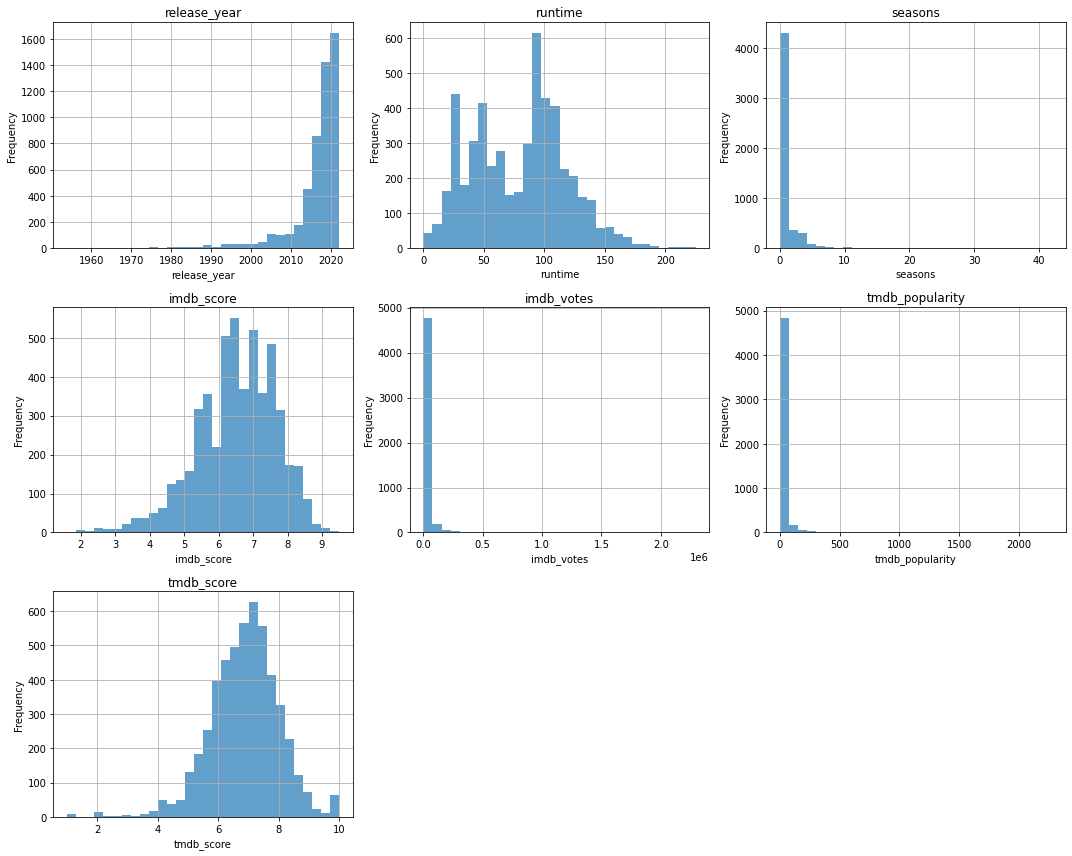

In [26]:
# Setup subplots
num_cols = len(numerical_features)
cols_per_row = 3  # You can change this to control layout
rows = (len(numerical_features) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Plot each distribution
for i, col in enumerate(numerical_features):
    df1[col].plot(kind='hist', bins=30, alpha=0.7, ax=axes[i], grid=True, title=col)
    axes[i].set_xlabel(col)

# Turn off empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

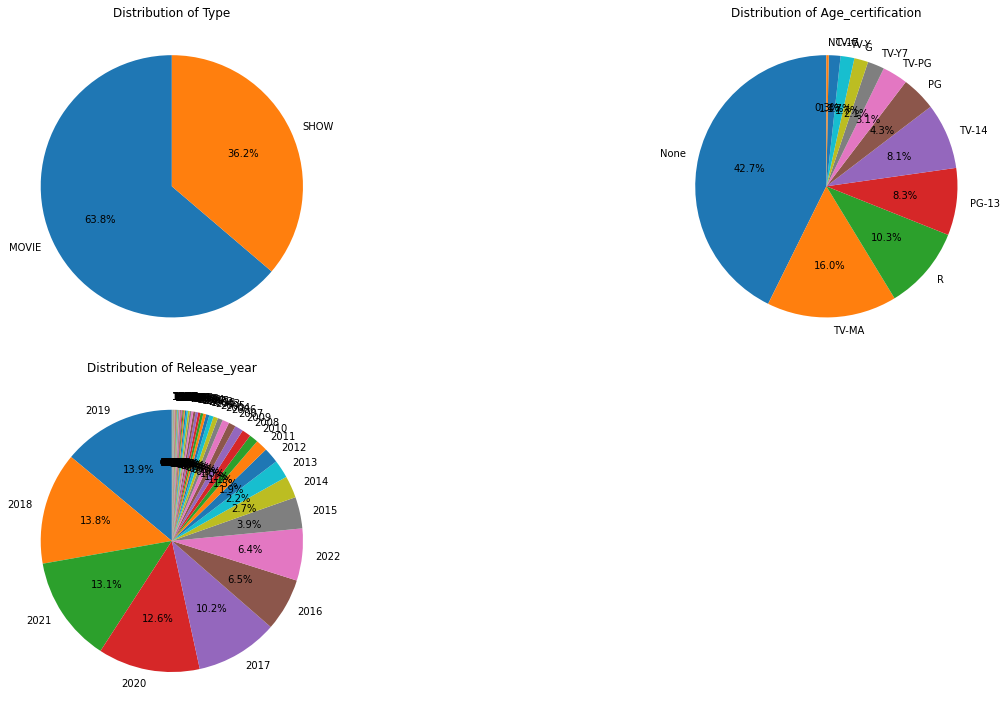

In [27]:
#Four visualisations of different categorical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df1[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

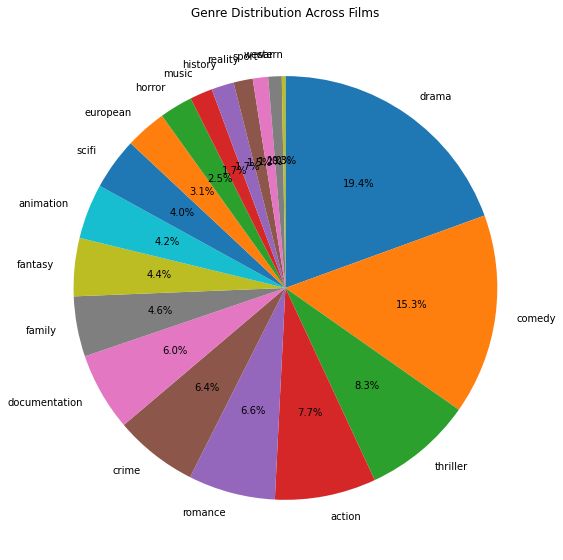

In [28]:
genres_features = ['action',
 'animation',
 'comedy',
 'crime',
 'documentation',
 'drama',
 'european',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'reality',
 'romance',
 'scifi',
 'sport',
 'thriller',
 'war',
 'western']

# Sum up how many films fall under each genre
genre_counts = df1[genres_features].sum().sort_values(ascending=False)

#Plot as pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

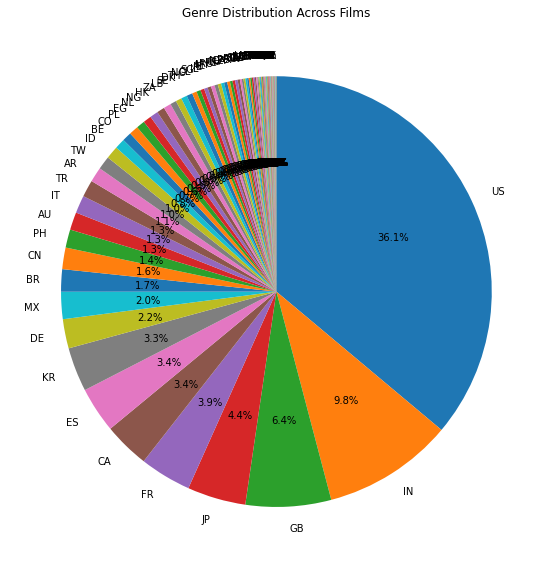

In [29]:
countries_features = ['AE','AL','AO', 'AR', 'AT', 'AU', 'BD', 'BE', 'BF', 'BG', 'BR', 'BS', 'BT', 'CA', 'CD', 'CH', 'CL', 'CM', 'CN', 'CO', 'CU', 'CY', 'CZ', 'DE', 'DK', 'DZ', 'EG', 'ES', 'FI', 'FO', 'FR', 'GB', 'GE', 'GH', 'GL', 'GR', 'GT', 'HK', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IO', 'IQ', 'IR', 'IS', 'IT', 'JO', 'JP', 'KE', 'KH', 'KN', 'KR', 'KW', 'LB', 'LK', 'LT', 'LU', 'Lebanon', 'MA', 'MC', 'MT', 'MU', 'MW', 'MX', 'MY', 'NG', 'NL', 'NO', 'NP', 'NZ', 'PE', 'PH', 'PK', 'PL', 'PR', 'PS', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SG', 'SN', 'SU', 'SY', 'TH', 'TN', 'TR', 'TW', 'TZ', 'UA','US','UY','VA','VE','VN','XX','ZA','ZW']
country_counts = df1[countries_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

# Preprocessing

In [30]:
df_changed = df1.copy(deep=False)

In [31]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import HashingEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

###### 'title' - string
Drop or extract features (or hash if needed)

In [32]:
le = LabelEncoder()
df_changed['title_encoded'] = le.fit_transform(df['title'])

In [33]:
df_changed = df_changed.drop(['title'], axis = 1)

In [34]:
df_changed.head()

,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,...,UA,US,UY,VA,VE,VN,XX,ZA,ZW,title_encoded
1,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,0.0,8.2,808582.0,40.965,8.179,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3858
2,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,0.0,7.7,107673.0,10.010,7.300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1122
3,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,0.0,8.2,534486.0,15.461,7.811,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2711
4,MOVIE,12 American military prisoners in World War II...,1967,None,150,0.0,7.7,72662.0,20.398,7.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4057
5,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,4.0,8.8,73424.0,17.617,8.306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2713


###### 'type' - category
Convert to dummies

In [35]:
df_changed = pd.get_dummies(df_changed, columns=['type'], drop_first=True, dtype = int)

In [36]:
df_changed.head()

,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,...,US,UY,VA,VE,VN,XX,ZA,ZW,title_encoded,type_SHOW
1,A mentally unstable Vietnam War veteran works ...,1976,R,114,0.0,8.2,808582.0,40.965,8.179,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3858,0
2,Intent on seeing the Cahulawassee River before...,1972,R,109,0.0,7.7,107673.0,10.010,7.300,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1122,0
3,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,0.0,8.2,534486.0,15.461,7.811,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2711,0
4,12 American military prisoners in World War II...,1967,None,150,0.0,7.7,72662.0,20.398,7.600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4057,0
5,A British sketch comedy series with the shows ...,1969,TV-14,30,4.0,8.8,73424.0,17.617,8.306,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2713,1


###### 'description' - text
TF-IDF or BERT embeddings

In [37]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
desc_matrix = tfidf.fit_transform(df_changed['description'].fillna(''))
desc_df = pd.DataFrame(desc_matrix.toarray(), columns=tfidf.get_feature_names_out())
desc_df.columns = ['desc_' + col for col in desc_df.columns]
df_changed = df_changed.drop('description', axis=1).reset_index(drop=True).join(desc_df)

In [38]:
df_changed.head()

,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,...,desc_worlds,desc_worst,desc_writer,desc_wrong,desc_year,desc_years,desc_york,desc_young,desc_younger,desc_youth
0,1976,R,114,0.0,8.2,808582.0,40.965,8.179,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.296942,0.0,0.0,0.0
1,1972,R,109,0.0,7.7,107673.0,10.010,7.300,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,1975,PG,91,0.0,8.2,534486.0,15.461,7.811,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,1967,None,150,0.0,7.7,72662.0,20.398,7.600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1969,TV-14,30,4.0,8.8,73424.0,17.617,8.306,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


###### 'release_year' - numeric	
✅Use as-is

###### 'age_certification' - category
Dummies or  encoding

In [39]:
df_changed = pd.get_dummies(df_changed, columns=['age_certification'], drop_first=True, dtype = int)

In [40]:
df_changed.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,...,age_certification_None,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7
0,1976,114,0.0,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1972,109,0.0,7.7,107673.0,10.010,7.300,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
2,1975,91,0.0,8.2,534486.0,15.461,7.811,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,1967,150,0.0,7.7,72662.0,20.398,7.600,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,1969,30,4.0,8.8,73424.0,17.617,8.306,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


###### 'runtime' - numeric	
✅ Use as-is or scale
###### 'seasons' - numeric	
✅ Use as-is (fill NaNs if any)	Number of seasons is important for series
###### 'imdb_score' - numeric	
✅ Use as-is	Predictive quality metric
###### 'imdb_votes' - numeric	
✅ Use as-is (may want log scale)	Large range, log1p may help
###### 'tmdb_popularity' - numeric	
✅ Use as-is (scale or log)	Strong signal
###### 'tmdb_score' - numeric	
✅ Use as-is	Another good quality metric

In [41]:
df_changed.shape

(5129, 1144)

In [42]:
sc = MaxAbsScaler()
sc = sc.fit_transform(df_changed)
df_mas = pd.DataFrame(sc, columns = df_changed.columns)
df_mas.head(10)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,...,age_certification_None,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7
0,0.977250,0.506667,0.000000,0.863158,0.352441,0.018014,0.8179,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.975272,0.484444,0.000000,0.810526,0.046932,0.004402,0.7300,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.976756,0.404444,0.000000,0.863158,0.232970,0.006799,0.7811,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.972799,0.666667,0.000000,0.810526,0.031672,0.008970,0.7600,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.973788,0.133333,0.095238,0.926316,0.032004,0.007747,0.8306,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.978734,0.417778,0.000000,0.842105,0.172181,0.007814,0.7800,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.974777,0.453333,0.000000,0.810526,0.067583,0.005636,0.7500,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.972799,0.488889,0.000000,0.810526,0.048839,0.006898,0.7500,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.979228,0.462222,0.000000,0.610526,0.030443,0.022130,0.6156,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.969832,0.702222,0.000000,0.789474,0.022120,0.006088,0.7300,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_mas.shape

(5129, 1144)

In [44]:
pca = PCA(n_components = 2)
pca.fit(df_mas)
df_pca = pca.transform(df_mas)
df_pca

array([[-0.22295696,  0.76968558],
       [ 0.00320334, -0.29527732],
       [-0.01967428, -0.2786409 ],
       ...,
       [-0.65758764, -0.39893852],
       [-0.65136392, -0.39148209],
       [ 0.12002257, -0.26116434]])

# Classification

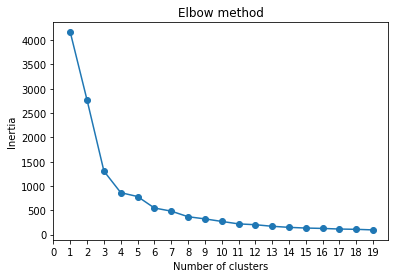

In [45]:
# Elbow algorithm in order to find opimal number of clusters
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(ticks = range(0,20))
plt.show()

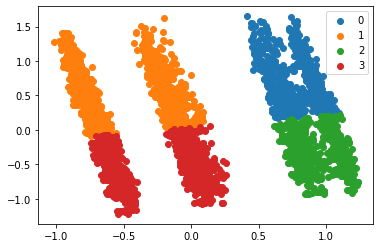

In [46]:
#Divide into clusters
kmeans = KMeans(n_clusters = 4, random_state=0)
label = kmeans.fit_predict(df_pca)
c4label = label
u = np.unique(label)
fig, ax = plt.subplots()
for i in u:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [47]:
def make_autopct(values): #percentage function
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct
c1 = Counter(label)
c1

Counter({1: 1627, 3: 1835, 2: 922, 0: 745})

In [48]:
pr1 = np.array([745, 1627, 922, 1835]) #Array for later visualization

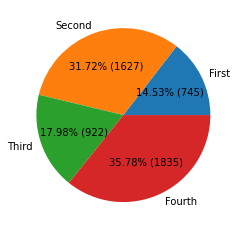

In [49]:
mylabels = ["First", "Second", "Third", "Fourth"]  #Cluster visualization
plt.pie(pr1, labels=mylabels, autopct=make_autopct(pr1))
plt.show()

In [81]:
dflabel4 = pd.DataFrame(df1.copy()) #dataframe with clusters
dflabel4['cluster'] = c4label
dflabel4.head()

,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BT,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KH,KN,KR,KW,LB,LK,LT,LU,Lebanon,MA,MC,MT,MU,MW,MX,MY,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW,cluster
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,0.0,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,0.0,7.7,107673.0,10.010,7.300,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,0.0,8.2,534486.0,15.461,7.811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,None,150,0.0,7.7,72662.0,20.398,7.600,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,4.0,8.8,73424.0,17.617,8.306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [85]:
numeric_cols = numerical_features

# Create a DataFrame of mean values per cluster
cluster_means = dflabel4.groupby('cluster')[numeric_cols].mean().T  # Transposed for better display
cluster_means.columns = [f'Cluster {c}' for c in cluster_means.columns]
cluster_means.insert(0, 'Feature', cluster_means.index)

# Display top N differentiating features (optional)
top_variance = cluster_means.drop('Feature', axis=1).var(axis=1).sort_values(ascending=False)
top_features_df = cluster_means.set_index('Feature').loc[top_variance.head(20).index].reset_index()

In [86]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

top_features_df.head(10)

,index,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,imdb_votes,24589.475,28881.948,15760.560,24562.200
1,runtime,39.181,99.275,38.434,97.150
2,tmdb_popularity,30.087,19.946,31.958,21.419
3,release_year,2016.522,2014.694,2018.029,2016.729
4,seasons,2.638,0.077,2.095,0.096
5,tmdb_score,7.497,6.479,7.438,6.551
6,imdb_score,7.037,6.328,6.955,6.250


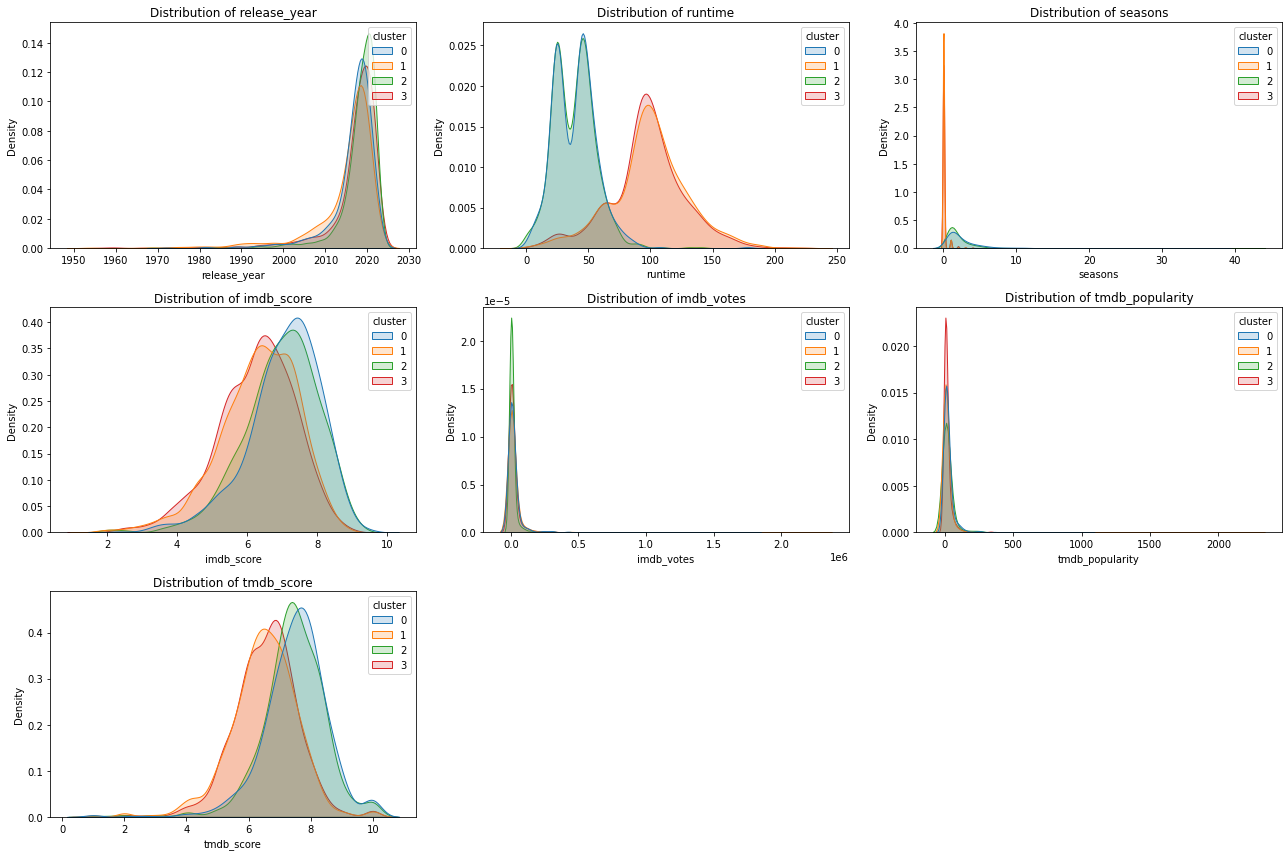

In [90]:
array_of_numeric = numeric_cols
# Set up subplots
num_cols = len(array_of_numeric)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, rows * 4))

# Plot distributions per cluster
for i, col in enumerate(array_of_numeric):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.kdeplot(data=dflabel4, x=col, hue='cluster', fill=True, common_norm=False, palette='tab10', alpha=0.2)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [91]:
cluster_dfs = {f'cluster_{i}': dflabel4[dflabel4['cluster'] == i].copy() for i in dflabel4['cluster'].unique()}

# Cluster 1

In [92]:
df_c1 = cluster_dfs['cluster_0']

In [113]:
df_c1.tail(10)

,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BT,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KH,KN,KR,KW,LB,LK,LT,LU,Lebanon,MA,MC,MT,MU,MW,MX,MY,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW,cluster
5098,Colin in Black & White,SHOW,The life of athlete Colin Kaepernick and his a...,2021,TV-14,32,1.0,5.5,7282.0,29.999,6.682,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5102,Tribes of Europa,SHOW,2074. In the wake of a mysterious global disas...,2021,TV-MA,47,1.0,6.7,12043.0,37.998,7.179,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5109,Welcome to Wedding Hell,SHOW,A relatable romance drama about a couple in th...,2022,TV-14,37,1.0,6.9,89.0,4.417,9.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5110,The Journalist,SHOW,A journalist known as the maverick of news med...,2022,TV-14,51,1.0,7.0,608.0,6.078,8.100,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5112,Bulgasal: Immortal Souls,SHOW,"Cursed since birth and exempt from death, a re...",2021,TV-MA,71,1.0,7.3,2063.0,10.958,8.100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5113,House of Secrets: The Burari Deaths,SHOW,"Suicide, murder or something else? This docuse...",2021,TV-MA,45,1.0,7.4,9944.0,7.749,7.600,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

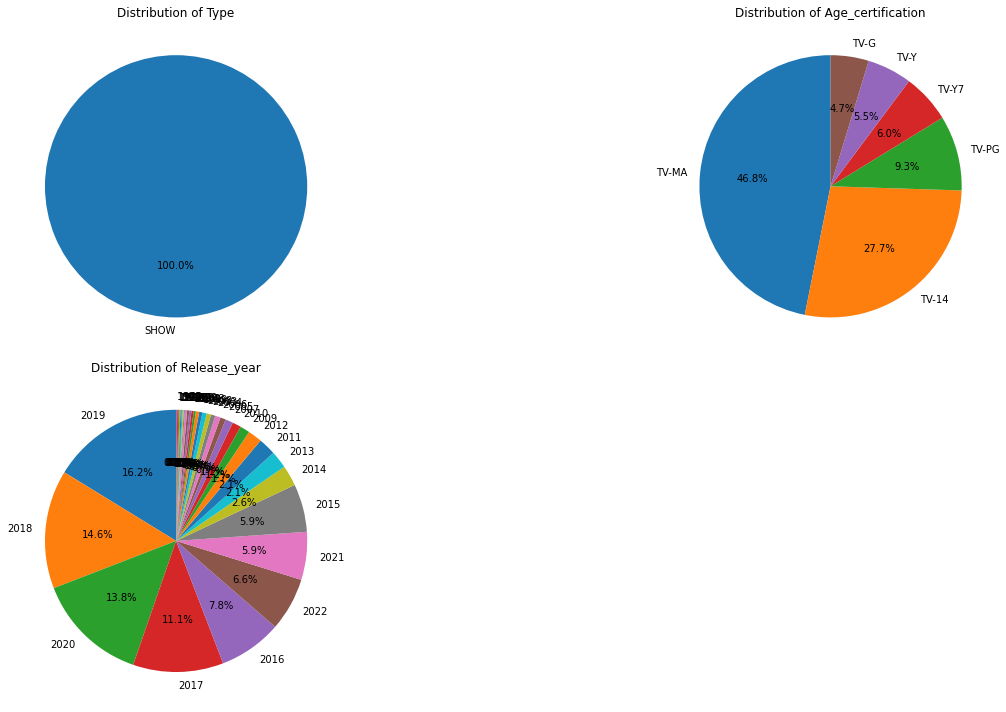

In [94]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df_c1[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

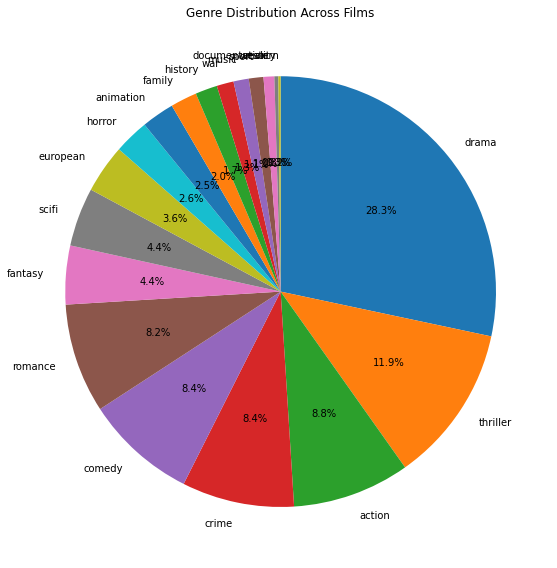

In [95]:
genre_counts = df_c1[genres_features].sum().sort_values(ascending=False)

#Plot as pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

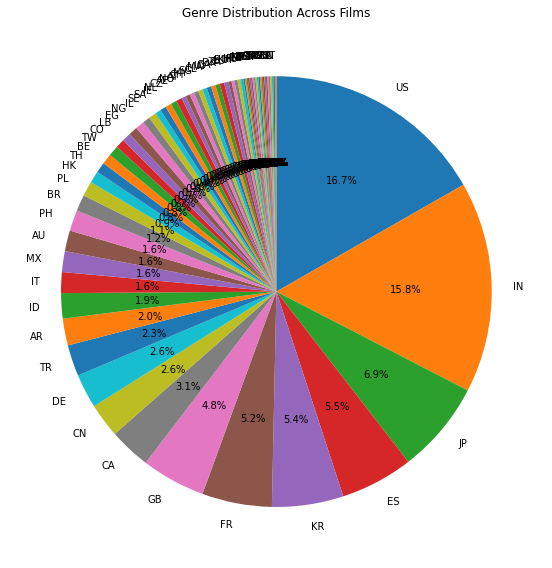

In [96]:
country_counts = df_c1[countries_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

# Cluster 2

In [97]:
df_c2 = cluster_dfs['cluster_1']

In [98]:
df_c2.head()

,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BT,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KH,KN,KR,KW,LB,LK,LT,LU,Lebanon,MA,MC,MT,MU,MW,MX,MY,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW,cluster
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,0.0,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,0.0,8.0,395024.0,17.770,7.800,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,0.0,7.7,155051.0,12.817,7.500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,0.0,7.7,112048.0,15.687,7.500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,0.0,5.8,69844.0,50.324,6.156,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


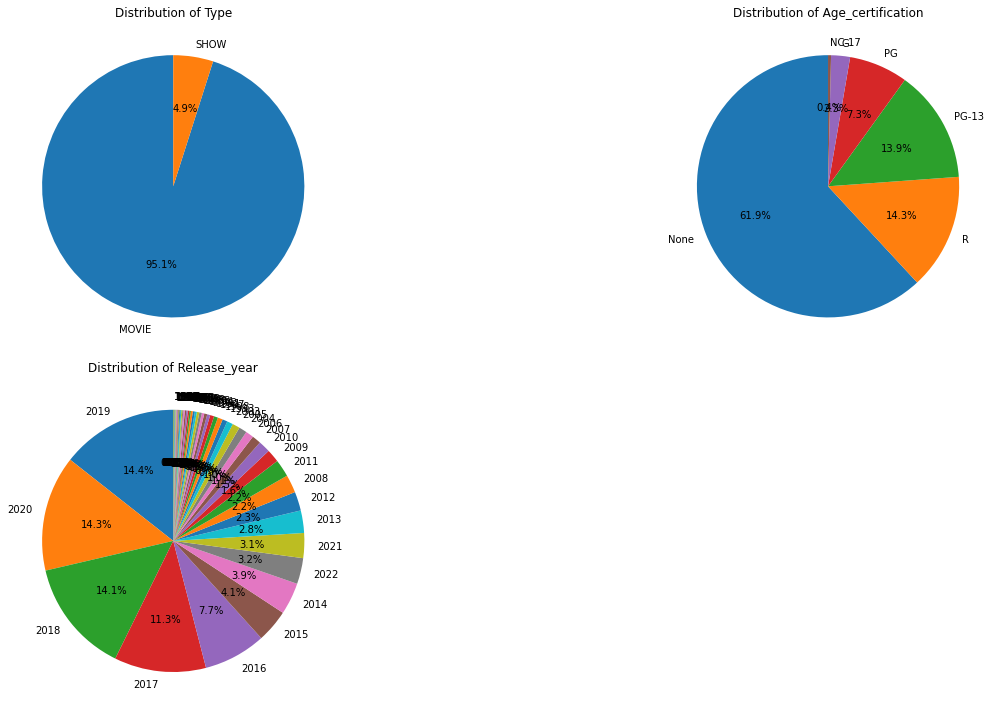

In [99]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df_c2[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

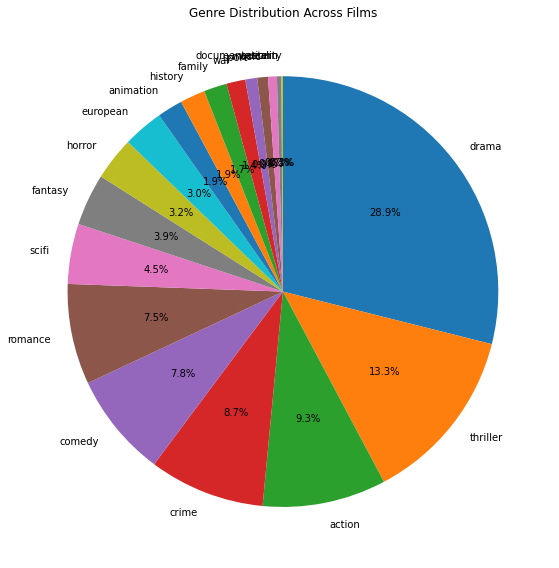

In [100]:
genre_counts = df_c2[genres_features].sum().sort_values(ascending=False)

#Plot as pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

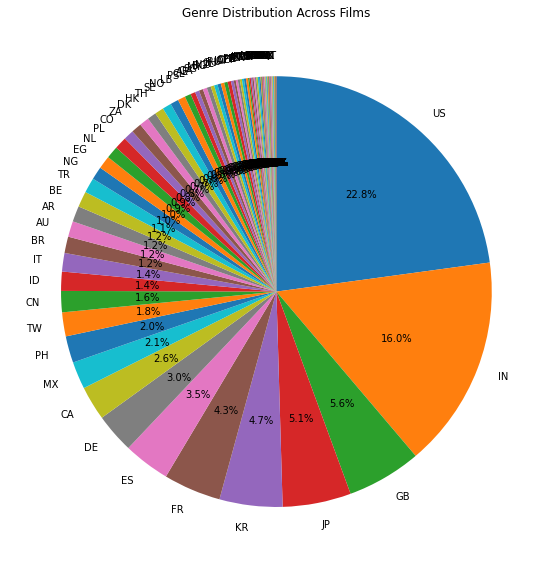

In [101]:
country_counts = df_c2[countries_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

# Cluster 3

In [102]:
df_c3 = cluster_dfs['cluster_2']

In [103]:
df_c3.head()

,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BT,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KH,KN,KR,KW,LB,LK,LT,LU,Lebanon,MA,MC,MT,MU,MW,MX,MY,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW,cluster
5,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,4.0,8.8,73424.0,17.617,8.306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
45,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,24.0,6.5,5104.0,42.196,6.500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
48,Wheel of Fortune,SHOW,This game show sees contestants solve word puz...,1983,TV-G,26,39.0,6.7,3145.0,5.935,6.800,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
59,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,TV-Y,10,13.0,6.1,1785.0,37.647,7.200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
91,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,42.0,7.4,24687.0,54.190,7.400,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


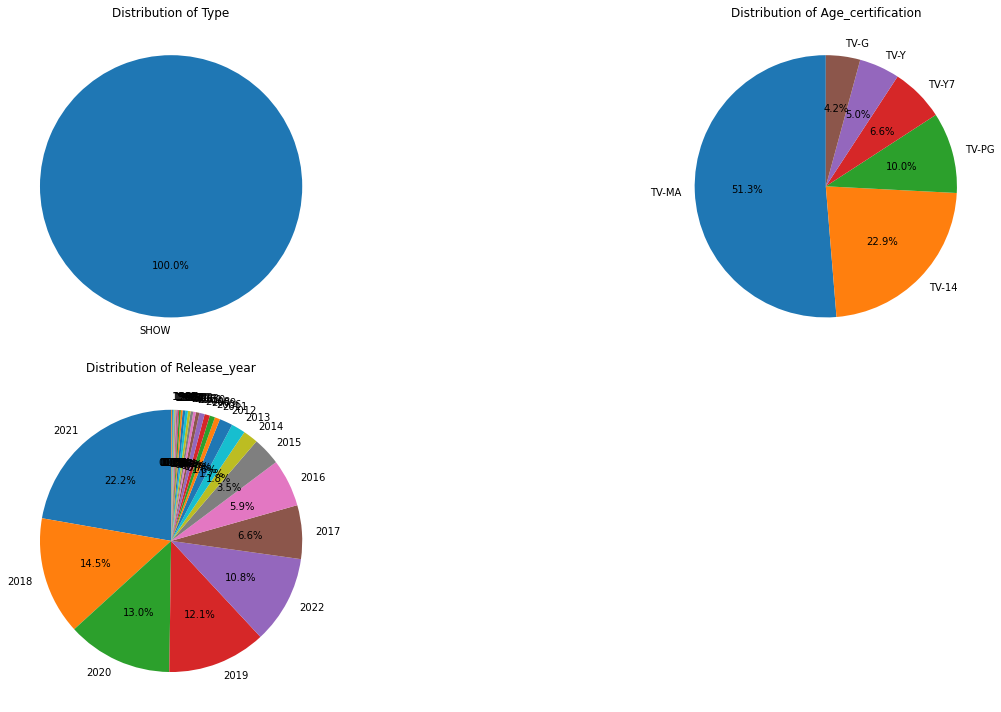

In [104]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df_c3[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

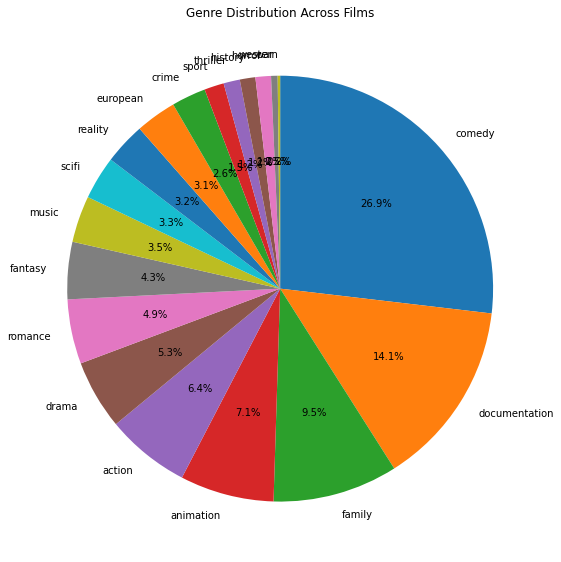

In [105]:
genre_counts = df_c3[genres_features].sum().sort_values(ascending=False)

#Plot as pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

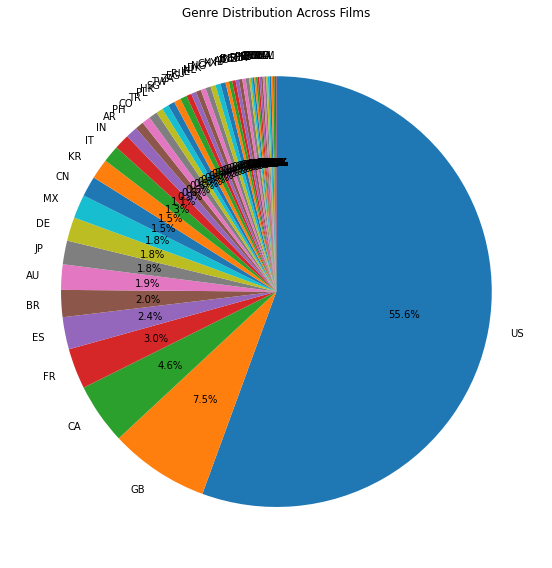

In [106]:
country_counts = df_c3[countries_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

# Cluster 4

In [107]:
df_c4 = cluster_dfs['cluster_3']

In [108]:
df_c4.head()

,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BT,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KH,KN,KR,KW,LB,LK,LT,LU,Lebanon,MA,MC,MT,MU,MW,MX,MY,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW,cluster
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,0.0,7.7,107673.0,10.010,7.300,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,0.0,8.2,534486.0,15.461,7.811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,None,150,0.0,7.7,72662.0,20.398,7.600,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
10,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,None,158,0.0,7.5,50748.0,13.844,7.300,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
11,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,0.0,7.3,16446.0,13.123,7.100,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


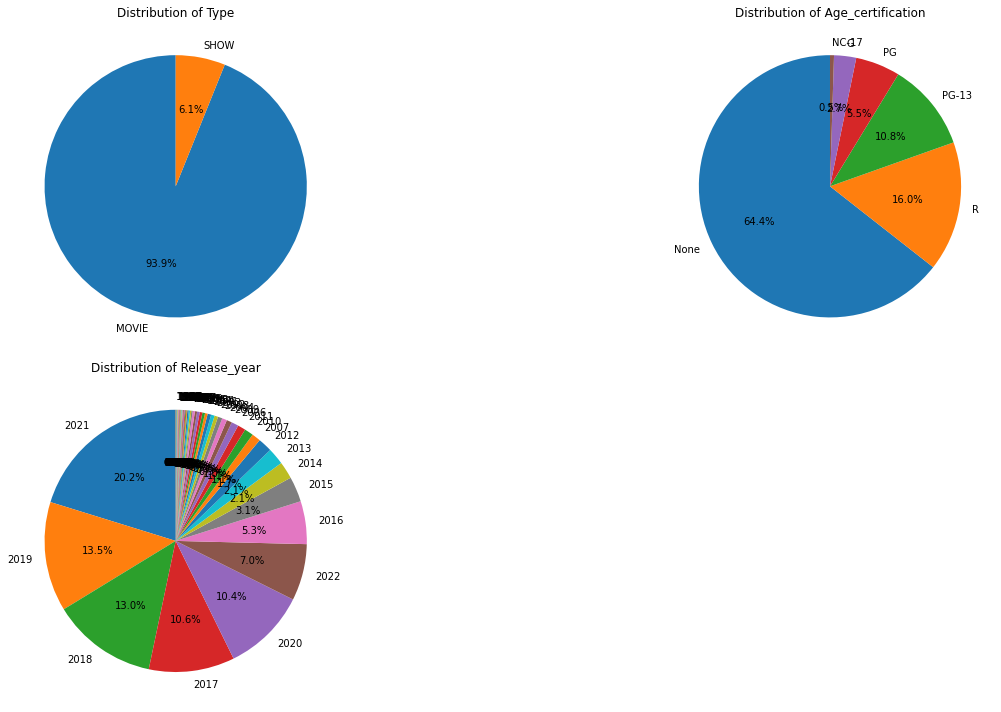

In [109]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df_c4[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

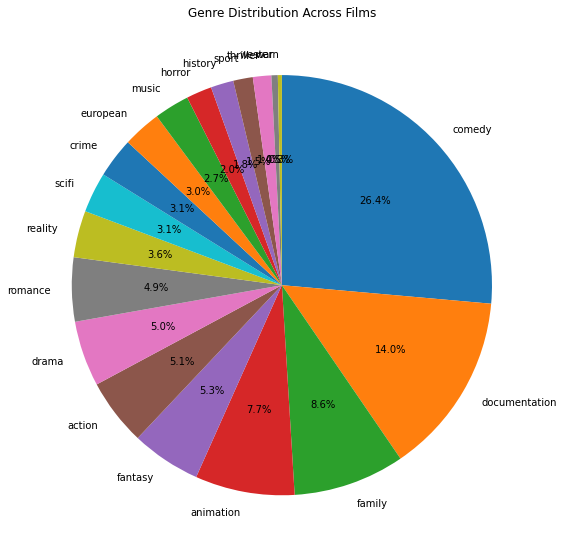

In [110]:
genre_counts = df_c4[genres_features].sum().sort_values(ascending=False)

#Plot as pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()

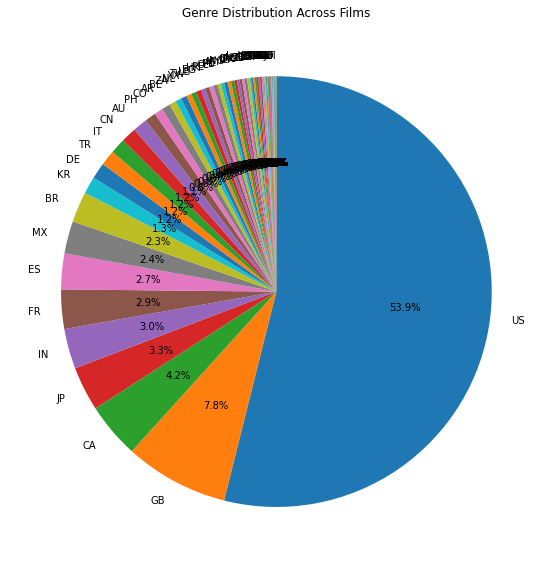

In [111]:
country_counts = df_c4[countries_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Genre Distribution Across Films')
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()
plt.show()